# Text vectorisation: Turning Text into Features 

## Part 2 — Word Embeddings and Word2Vec

> You shall know a word by the company it keeps (Firth, 1957).

`Word2vec` [Mikolov et al., 2013](https://arxiv.org/abs/1301.3781) and related techniques (e.g., [GloVe](https://nlp.stanford.edu/projects/glove/)) use the context of a given word — i.e., the words surrounding a word — to learn its meaning and represent it as vectors. In that sense, word embeddings and `Word2vec` in particualr are text vectorisation techniques.

We will use `gensim` to perform to  perform `Word2Vec`.

Two word2vec models exist: Skip-Gram and Continuous Bag of Words (CBOW)

The skip-gram model predicts the probabilities of a word given the context of word or words. For example, in the sentence "UK agrees Brexit trade deal", we have a target word and context words surrounding the target word. The number of words to be considered around the target word is called the window size. Using a window size of 2, here are the first three target and context variables for the sentence "UK agrees Brexit trade deal with EU": 

| Target word | Context word(s) |
|---|--------|
| UK | agree Brexit |
| agree | UK Brexit trade |
| Brexit | UK agree trade deal  |

See Akshay Kulkarni and Adarsha Shivananda. 2019. Natural Language Processing Recipes. [Chapter 3: Converting Text to Features](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#)

In [1]:
# Imstall and import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

! pip install gensim
import gensim
from gensim.models import Word2Vec
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.summarization.textcleaner import split_sentences

from sklearn.decomposition import PCA

import re
import os

#### Text corpus

In [2]:
# Load the parsed news dataset 
corpus = pd.read_csv('sample_news_large_phrased.csv', index_col='index')

In [3]:
corpus.head(1)

query                                title  \
index                                                   
0      Hong Kong  Horrifying view of fires from space   

                                                    text  \
index                                                      
0      Video Image Satellite images show insane view ...   

                           published         site  \
index                                               
0      2019-11-08T23:51:00.000+02:00  news.com.au   

                                                  tokens  
index                                                     
0      video|*|image|*|satellite|*|image|*|insane|*|v...

In [4]:
# Subset news stories about brexit
corpus_brexit = corpus[corpus['query']=='brexit']

corpus_toy=corpus_brexit.iloc[[7,22], [1]]

# Set the maximum width of columns
pd.options.display.max_colwidth = 200

corpus_toy.head(5)

title
index                                                                                                                    
132    Brexit news: Gina Miller unveils new Remainer plot to block Brexit in general election | UK | News | Express.co.uk
147           Brexit news: Labour pledge to continue ‘freedom of movement’ infuriates Leavers | UK | News | Express.co.uk

In [5]:
# Convert your tokens in the News dataset into a list
corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))

<ipython-input-5-148acfbc1404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))


In [6]:
corpus['tokens']= corpus['tokens'].apply(lambda token_string: token_string.split('|*|'))

In [7]:
corpus['tokens'].head()

index
0    [video, image, satellite, image, insane, view, nsw, fire, space, satellite, image, huge, smoke, billow, number, bushfire, nsw, nsw, fire, space, source, twitter, startling, satellite, image, fire,...
1    [chief_executive, address, press, citywide, chaos, transport, disruption, early, police, shoot, protester, leave, -pron-, intensive, care, separately, man, set, fire, dispute, chaos, continue, sho...
2    [hong_kong, cnn, china, announce, curfew, online, gaming, minor, new, measure, aim, curb, video, game, addiction, official, government, guideline, apply, online, gaming, platform, operate, country...
3    [washington, cnn, president_donald, trump, relentlessly, dishonest, week, scandal, -pron-, dealing, ukraine, false_claim, component, story, trump, false_claim, week, second, high, total, week, -pr...
4    [cnn, bread, -pron-, likely, think, long, -pron-, hungry, slice, sourdough, crave, tortilla, -pron-, imagine, lot, -pron-, bread, easy, picture, -pron-, hard, define, br

In [8]:
# Training the word2vec skip-gram model
skipgram = Word2Vec(corpus['tokens'], size =300, window = 3, min_count=1,sg = 1)


In [9]:
skipgram['brexit']

<ipython-input-9-af6ecfbb24a8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  skipgram['brexit']


array([-0.08242402,  0.06249174,  0.06196998,  0.02450178, -0.06245153,
        0.08160803,  0.10446405, -0.0788238 ,  0.0333649 ,  0.08781707,
       -0.15932539, -0.14038484, -0.07381256,  0.1566949 , -0.0355307 ,
       -0.15420663,  0.14139552,  0.1820658 ,  0.25590578,  0.0175742 ,
       -0.14624271,  0.06071041, -0.11706696,  0.07574468,  0.02522972,
        0.1048102 , -0.18706957,  0.02630916,  0.02687091, -0.02241969,
       -0.10011616,  0.27947047,  0.00656245,  0.05205861, -0.04416619,
        0.10871114, -0.05648249, -0.11794769,  0.10108022,  0.17993388,
        0.1508497 , -0.05433322,  0.10560849, -0.11539935,  0.12670301,
       -0.00318295,  0.09930611, -0.02511622,  0.12822641,  0.16849135,
       -0.0216679 ,  0.00275598,  0.02417092, -0.09807049,  0.05597882,
       -0.15360951, -0.01872508,  0.02922883, -0.13552868, -0.12970498,
        0.13250604, -0.02045668,  0.10900768, -0.0046311 ,  0.00552289,
        0.2540957 ,  0.04475067, -0.15667234,  0.00368715, -0.19

In [10]:
print("Dimensionality—size of vocabulary and size of vectors:", skipgram)

# access vector for one word, "brexit" in this instance
print("vector for 'brexit':", skipgram['brexit'])

Dimensionality—size of vocabulary and size of vectors: Word2Vec(vocab=10834, size=300, alpha=0.025)
vector for 'brexit': [-0.08242402  0.06249174  0.06196998  0.02450178 -0.06245153  0.08160803
  0.10446405 -0.0788238   0.0333649   0.08781707 -0.15932539 -0.14038484
 -0.07381256  0.1566949  -0.0355307  -0.15420663  0.14139552  0.1820658
  0.25590578  0.0175742  -0.14624271  0.06071041 -0.11706696  0.07574468
  0.02522972  0.1048102  -0.18706957  0.02630916  0.02687091 -0.02241969
 -0.10011616  0.27947047  0.00656245  0.05205861 -0.04416619  0.10871114
 -0.05648249 -0.11794769  0.10108022  0.17993388  0.1508497  -0.05433322
  0.10560849 -0.11539935  0.12670301 -0.00318295  0.09930611 -0.02511622
  0.12822641  0.16849135 -0.0216679   0.00275598  0.02417092 -0.09807049
  0.05597882 -0.15360951 -0.01872508  0.02922883 -0.13552868 -0.12970498
  0.13250604 -0.02045668  0.10900768 -0.0046311   0.00552289  0.2540957
  0.04475067 -0.15667234  0.00368715 -0.1926162   0.02201383 -0.10170999
  0.0

<ipython-input-10-2527db47bd23>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print("vector for 'brexit':", skipgram['brexit'])


In [11]:
# Similarity between two tokens, e.g., brexit and deal
skipgram.wv.similarity('brexit', 'deal')

0.9965997

In [12]:
# The most similar token to a given token, e.g., brexit
skipgram.wv.most_similar(positive = "brexit")

[('kind', 0.9997485280036926),
 ('comment', 0.9997482299804688),
 ('mean', 0.9997424483299255),
 ('win', 0.9997379779815674),
 ('hard', 0.9997315406799316),
 ('believe', 0.999728262424469),
 ('love', 0.9997280240058899),
 ('maybe', 0.9997235536575317),
 ('lot', 0.9997203946113586),
 ('away', 0.9997173547744751)]

<ipython-input-13-d1d78608db6a>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data = skipgram[skipgram.wv.vocab]


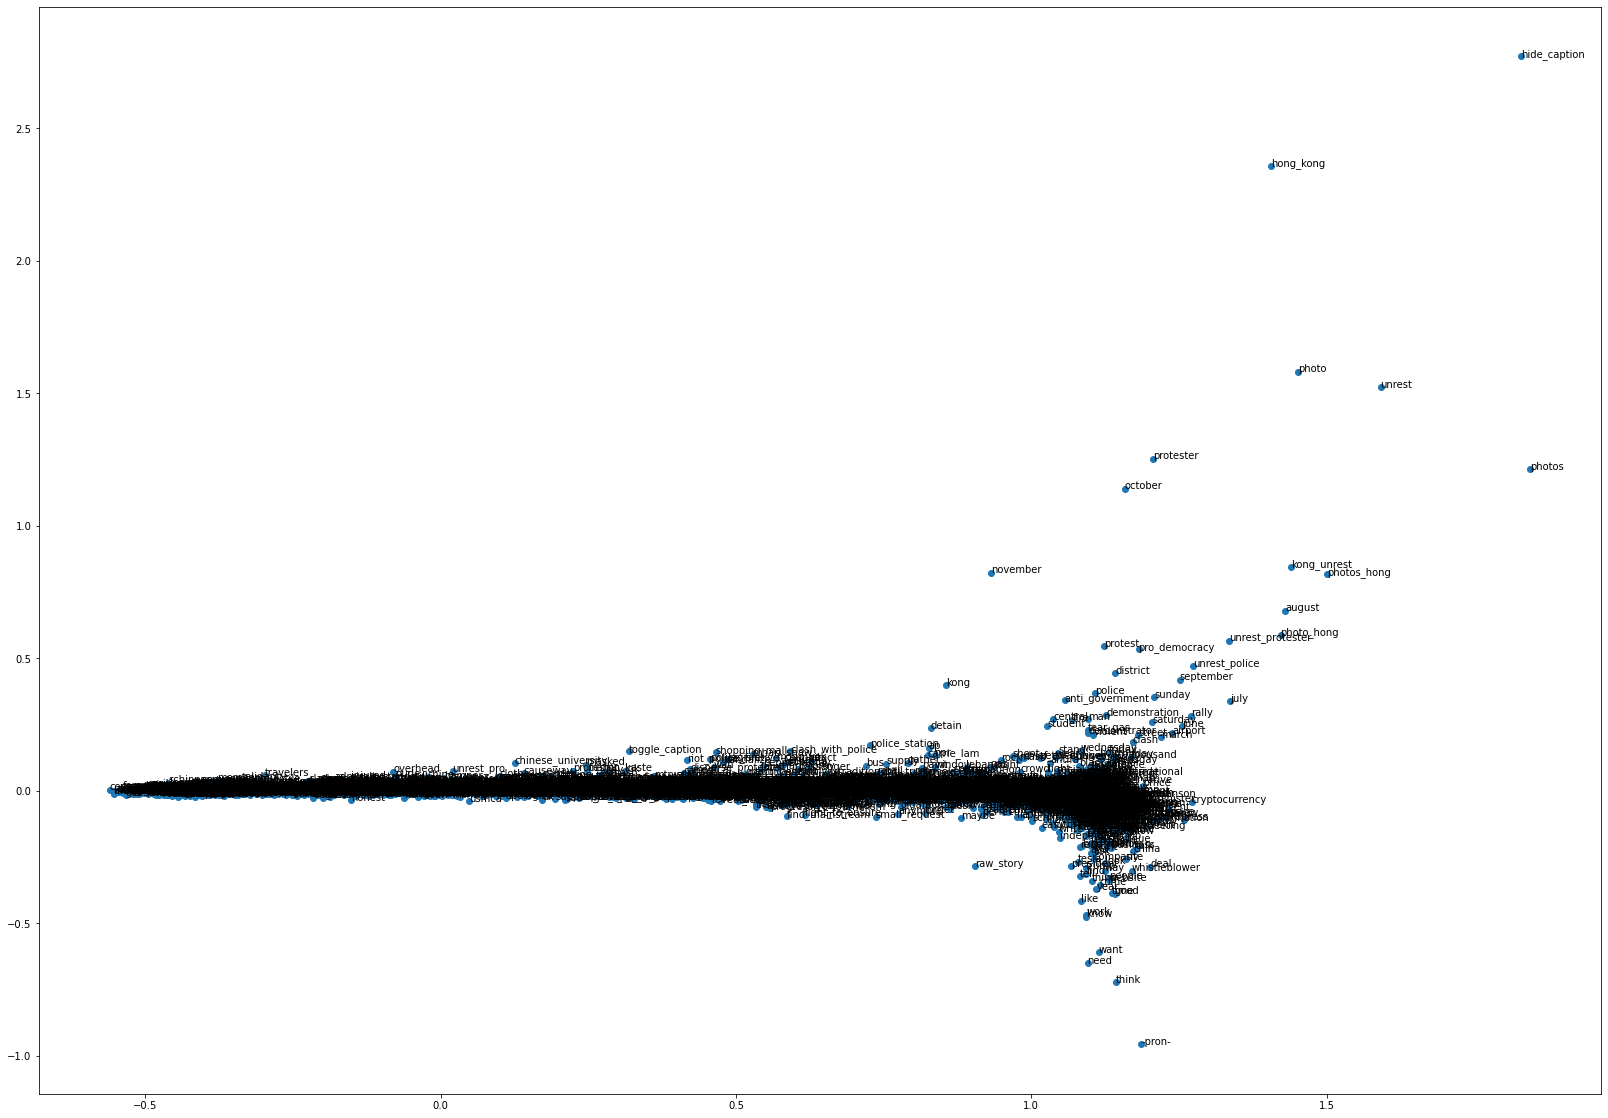

In [13]:
# Fit Principal component analysis (PCA) on the skipgram model output and plot the first 2 components

data = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(data)
# create a scatter plot of the projection
plt.figure(figsize=(28,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
       plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


#### Use a pre-trained model using Google News data

See the article by Garg etal. 2018 [Word embeddings quantify 100 years of gender and ethnic stereotypes](https://www.pnas.org/content/115/16/E3635) 

In [14]:
# Load the Word2vec model trained on the Google News dataset 
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

#### Use the pretrained models to identify possible biases and stereotypes

In [15]:
# Obtain vectors for terms in the model
immigration = wv['immigration']
immigration

array([-1.16210938e-01,  1.35742188e-01,  1.36718750e-01,  1.42578125e-01,
       -2.55859375e-01, -2.87109375e-01,  1.05468750e-01,  2.40234375e-01,
       -2.51953125e-01, -6.29882812e-02,  2.91015625e-01, -3.34472656e-02,
       -2.78320312e-02,  1.82617188e-01,  4.41894531e-02, -1.02539062e-01,
        1.40625000e-01,  6.25000000e-01, -1.04492188e-01, -2.40234375e-01,
        7.51953125e-02, -3.90625000e-02,  3.35937500e-01, -1.33789062e-01,
       -6.05468750e-02, -5.07812500e-02,  1.24511719e-01, -2.29492188e-01,
        1.78710938e-01,  7.23266602e-03,  1.53320312e-01, -4.29687500e-02,
       -5.90820312e-02, -1.51367188e-01,  1.36718750e-02, -6.68945312e-02,
       -1.87988281e-02,  1.26953125e-01,  8.69140625e-02, -5.07812500e-02,
       -2.05078125e-01, -1.35742188e-01,  2.59765625e-01,  1.42578125e-01,
       -2.71484375e-01,  9.71679688e-02, -1.24511719e-01,  2.55859375e-01,
        8.00781250e-02,  3.90625000e-02,  8.44726562e-02, -1.29882812e-01,
       -1.42578125e-01,  

In [16]:
print(wv.most_similar(positive=['immigration'], topn=20))

[('Immigration', 0.7575444579124451), ('illegal_immigration', 0.7396935224533081), ('immigrations', 0.7351098656654358), ('illegal_immigrants', 0.661632776260376), ('immigation', 0.6604097485542297), ('immigrants', 0.6578113436698914), ('illegal_immigrant', 0.6361725330352783), ('immigration_reform', 0.6335227489471436), ('illegal_alien', 0.6089527010917664), ('deportations', 0.6071246862411499), ('deportation', 0.6051470041275024), ('immigrant', 0.6017557382583618), ('undocumented_immigrants', 0.5970046520233154), ('IMMIGRATION', 0.5869342088699341), ('undocumented_workers', 0.5762966275215149), ('immi_gration', 0.5624114274978638), ('deporting', 0.5618883967399597), ('illegal_aliens', 0.55970698595047), ('attorney_Ilana_Greenstein', 0.5589761734008789), ('deport', 0.5580031275749207)]


In [17]:
# print the 5 most similar words to “nurse” or “librarian”
print(wv.most_similar(positive=['nurse', 'librarian'], topn=20))

[('registered_nurse', 0.7211818695068359), ('reference_librarian', 0.634443461894989), ('nurse_practitioner', 0.6301048994064331), ('teacher', 0.6299265623092651), ('guidance_counselor', 0.6149507761001587), ('respiratory_therapist', 0.6086797118186951), ('midwife', 0.5967817902565002), ('schoolteacher', 0.5860755443572998), ('dental_hygienist', 0.5835506916046143), ('neonatal_nurse', 0.5728733539581299), ('medical_transcriptionist', 0.5722984075546265), ('x_ray_technician', 0.5703535079956055), ('radiology_technician', 0.567882776260376), ('nurses', 0.5677641034126282), ('para_educator', 0.5656979084014893), ('nurse_midwife', 0.559863269329071), ('Librarian', 0.5595521330833435), ('candy_striper', 0.5586028099060059), ('receptionist', 0.5556811690330505), ('Licensed_Practical_Nurse', 0.5554629564285278)]


In [18]:
# Compare similarities of pairs of concepts
pairs = [
    ('sociology', 'society'), 
    ('sociology', 'individual'),
    ('sociology', 'market'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'sociology'	'society'	0.26
'sociology'	'individual'	0.01
'sociology'	'market'	-0.01


#### Popular analogy tasks

In [19]:
# Vector relations and word analogies e.g. vector_King - vector_Man = vector_Queen - vector_Woman
wv.most_similar(positive=['king', 'women'], negative=['man'])

[('queen', 0.4827325940132141),
 ('queens', 0.4667813777923584),
 ('kumaris', 0.4653733968734741),
 ('kings', 0.4558638334274292),
 ('womens', 0.422832190990448),
 ('princes', 0.4176960587501526),
 ('Al_Anqari', 0.4172550439834595),
 ('concubines', 0.4011078476905823),
 ('monarch', 0.39624831080436707),
 ('monarchy', 0.39430153369903564)]

In [20]:
# Another analogy example
wv.most_similar(positive=['Rome', 'France'], negative=['Paris'])

[('Italy', 0.7143559455871582),
 ('Italians', 0.5599662661552429),
 ('Sicily', 0.5547021627426147),
 ('Flaminio_Stadium', 0.5299074649810791),
 ('Spain', 0.5046595335006714),
 ('Bambino_Gesu_Hospital', 0.4948221445083618),
 ('Italian', 0.49266600608825684),
 ('Portugal', 0.48604875802993774),
 ('Val_Di_Fiemme', 0.48168694972991943),
 ('Antonio_Martino', 0.48000505566596985)]

### Different ways of storing and accessing your corpus for Word2Vec training

In [21]:
# Save in a variable the path to your directory where you store your text files 
DocByLine = '/Users/valentindanchev/Documents/Teaching/sc207/DocByLine'

If you have a plain-text file or files where each 'document' is on its own line, you can use the class [`MyPreprocessedSentences`](https://rare-technologies.com/word2vec-tutorial/) to process the input file by file, line by line. The class collects documents and processes them using the function `simple_preprocess` from the module `gensim.utils`, which contains various general utility functions. The function converts a document into a list of tokens that are lowercased and de-accented (optional). We use txt files from the Gutenberg project, including the books [Pride and Prejudice](http://www.gutenberg.org/ebooks/1342), [Frankenstein](http://www.gutenberg.org/ebooks/84), and others. 

Parameters of `simple_preprocess`: 

* `doc` This is your input document (str).

* `min_len` Minimum lenght of token in output (inclusive). Shorter tokens are discarded. Default is 2. 

* `max_len` Maximum length of token in output (inclusive). Longer tokens are discarded. Default is 15. 

* `deacc` Remove accent marks from tokens using the deaccent() function. Default is `False`.

Let's add `simple_preprocess` to the `MySentences` class:

In [22]:
# Define the class MyPreprocessedSentences
class MyPreprocessedSentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            # specify encoding "cp437" as other encodings, e.g., "utf8" may give you an error
            for line in open(os.path.join(self.dirname, fname), encoding="cp437"):
                yield gensim.utils.simple_preprocess(line, deacc=True) # vocabulary preprocessing 

In [23]:
# Apply MyPreprocessedSentences and fit the vanilla Word2Vec model to the preprocessed sentences
sentences = MyPreprocessedSentences(DocByLine) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, min_count=1)

You can view the model vocabulary in the field `vocab` of the Word2Vec model's `wv` property. The vocabulary is stored as a dictionary where each key is a token. 

In [24]:
# Show the vocabulary of your Word2Vec model
model.wv.vocab

{'it': <gensim.models.keyedvectors.Vocab at 0x7fe548504a30>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fe548511610>,
 'truth': <gensim.models.keyedvectors.Vocab at 0x7fe529121fa0>,
 'universally': <gensim.models.keyedvectors.Vocab at 0x7fe529121c40>,
 'acknowledged': <gensim.models.keyedvectors.Vocab at 0x7fe529121160>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fe529121460>,
 'single': <gensim.models.keyedvectors.Vocab at 0x7fe529130040>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7fe529130e20>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fe5291309a0>,
 'possession': <gensim.models.keyedvectors.Vocab at 0x7fe5383bc550>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fe5383bc8e0>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7fe5383bc970>,
 'fortune': <gensim.models.keyedvectors.Vocab at 0x7fe5383bcdf0>,
 'must': <gensim.models.keyedvectors.Vocab at 0x7fe5383bc760>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7fe5485234f0>,
 'want': <gensim.models.keyedvectors.Vo

In [25]:
# Show the size of the vocabulary
len(model.wv.vocab)
# Change the min_len parameter of the simple_preprocess function in the MyPreprocessedSentences class 
# and check again the length of the vocabulary

115

Sometimes our docuemtns are not neatly organised such that each line in a file is a 'document'. For example, we may have many books each stored as a single file in a directory.

In [26]:
DocByFile = '/Users/valentindanchev/Documents/Teaching/sc207/DocByFile'
DocByFile

'/Users/valentindanchev/Documents/Teaching/sc207/DocByFile'

In [27]:
class FromBooksToSentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            #with open(os.path.join(self.dirname, fname), encoding="cp437") as f:
            with open(os.path.join(self.dirname, fname), errors='ignore') as f:
                # Read each file and replace multiple characters at once using nested replace()
                text = f.read().replace('\n', '').replace('”', '').replace('“', '')
                #print(text)
                # Use the re module to replace all multiple whitespaces with single whitespace 
                text = re.sub('\s+',' ', text)
                #print(text)
                # print(text) # uncomment to see the output
                # Split the text into a list of sentences using the split_sentences function from gensim   
                for sentence in split_sentences(text):
                    print("SENTENCE:",sentence) # uncomment to see the output
                    yield gensim.utils.simple_preprocess(sentence, deacc=True)

In [28]:
sentences = FromBooksToSentences(DocByFile)
model = gensim.models.Word2Vec(sentences, min_count=2)

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: She assured him that no one intended to play, and the silence of the whole party on the subject seemed to justify her.
SENTENCE: Mr. Hurst had therefore nothing to do, but to stretch himself on one of the sofas and go to sleep.
SENTENCE: Darcy took up a book; Miss Bingley did the same; and Mrs. Hurst, principally occupied in playing with her bracelets and rings, joined now and then in her brother’s conversation with Miss Bennet.
SENTENCE: Miss Bingley’s attention was quite as much engaged in watching Mr. Darcy’s progress through _his_ book, as in reading her own; and she was perpetually either making some inquiry, or looking at his page.
SENTENCE: She could not win him, however, to any conversation; he merely answered her question, and read on.
SENTENCE: At length, quite exhausted by the attempt to be amused with her own book, which she had only chosen because it was the second volume of his, she gave a great yawn and said, How pleasant it is to spend an evening in this way!


SENTENCE: Your portion is unhappily so small that it will in all likelihood undo the effects of your loveliness and amiable qualifications.
SENTENCE: As I must therefore conclude that you are not serious in your rejection of me, I shall choose to attribute it to your wish of increasing my love by suspense, according to the usual practice of elegant females.
SENTENCE: I do assure you, sir, that I have no pretensions whatever to that kind of elegance which consists in tormenting a respectable man.
SENTENCE: I would rather be paid the compliment of being believed sincere.
SENTENCE: I thank you again and again for the honour you have done me in your proposals, but to accept them is absolutely impossible.
SENTENCE: My feelings in every respect forbid it.
SENTENCE: Can I speak plainer?
SENTENCE: Do not consider me now as an elegant female, intending to plague you, but as a rational creature, speaking the truth from her heart.
SENTENCE: You are uniformly charming!
SENTENCE: cried he, with an 

SENTENCE: She was not rendered formidable by silence; but whatever she said was spoken in so authoritative a tone, as marked her self-importance, and brought Mr. Wickham immediately to Elizabeth’s mind; and from the observation of the day altogether, she believed Lady Catherine to be exactly what he represented.
SENTENCE: When, after examining the mother, in whose countenance and deportment she soon found some resemblance of Mr. Darcy, she turned her eyes on the daughter, she could almost have joined in Maria’s astonishment at her being so thin and so small.
SENTENCE: There was neither in figure nor face any likeness between the ladies.
SENTENCE: Miss de Bourgh was pale and sickly; her features, though not plain, were insignificant; and she spoke very little, except in a low voice, to Mrs. Jenkinson, in whose appearance there was nothing remarkable, and who was entirely engaged in listening to what she said, and placing a screen in the proper direction before her eyes.
SENTENCE: After 

SENTENCE: Jane looked well, and Elizabeth had little opportunity of studying her spirits, amidst the various engagements which the kindness of her aunt had reserved for them.
SENTENCE: But Jane was to go home with her, and at Longbourn there would be leisure enough for observation.
SENTENCE: It was not without an effort, meanwhile, that she could wait even for Longbourn, before she told her sister of Mr. Darcy’s proposals.
SENTENCE: To know that she had the power of revealing what would so exceedingly astonish Jane, and must, at the same time, so highly gratify whatever of her own vanity she had not yet been able to reason away, was such a temptation to openness as nothing could have conquered but the state of indecision in which she remained as to the extent of what she should communicate; and her fear, if she once entered on the subject, of being hurried into repeating something of Bingley which might only grieve her sister further.
SENTENCE: Chapter 39 It was the second week in May,

SENTENCE: How thankful am I that we never let them know what has been said against him; we must forget it ourselves.
SENTENCE: They were off Saturday night about twelve, as is conjectured, but were not missed till yesterday morning at eight.
SENTENCE: The express was sent off directly.
SENTENCE: My dear Lizzy, they must have passed within ten miles of us.
SENTENCE: Colonel Forster gives us reason to expect him here soon.
SENTENCE: Lydia left a few lines for his wife, informing her of their intention.
SENTENCE: I must conclude, for I cannot be long from my poor mother.
SENTENCE: I am afraid you will not be able to make it out, but I hardly know what I have written.
SENTENCE: Without allowing herself time for consideration, and scarcely knowing what she felt, Elizabeth on finishing this letter instantly seized the other, and opening it with the utmost impatience, read as follows: it had been written a day later than the conclusion of the first.
SENTENCE: By this time, my dearest sister, 

SENTENCE: I thank you for my share of the favour, said Elizabeth; but I do not particularly like your way of getting husbands.
SENTENCE: Their visitors were not to remain above ten days with them.
SENTENCE: Mr. Wickham had received his commission before he left London, and he was to join his regiment at the end of a fortnight.
SENTENCE: No one but Mrs. Bennet regretted that their stay would be so short; and she made the most of the time by visiting about with her daughter, and having very frequent parties at home.
SENTENCE: These parties were acceptable to all; to avoid a family circle was even more desirable to such as did think, than such as did not.
SENTENCE: Wickham’s affection for Lydia was just what Elizabeth had expected to find it; not equal to Lydia’s for him.
SENTENCE: She had scarcely needed her present observation to be satisfied, from the reason of things, that their elopement had been brought on by the strength of her love, rather than by his; and she would have wondered 

SENTENCE: I expected to find a more reasonable young woman.
SENTENCE: But do not deceive yourself into a belief that I will ever recede.
SENTENCE: I shall not go away till you have given me the assurance I require.
SENTENCE: And I certainly _never_ shall give it.
SENTENCE: I am not to be intimidated into anything so wholly unreasonable.
SENTENCE: Your ladyship wants Mr. Darcy to marry your daughter; but would my giving you the wished-for promise make _their_ marriage at all more probable?
SENTENCE: Supposing him to be attached to me, would _my_ refusing to accept his hand make him wish to bestow it on his cousin?
SENTENCE: Allow me to say, Lady Catherine, that the arguments with which you have supported this extraordinary application have been as frivolous as the application was ill-judged.
SENTENCE: You have widely mistaken my character, if you think I can be worked on by such persuasions as these.
SENTENCE: How far your nephew might approve of your interference in _his_ affairs, I ca

SENTENCE: Frankenstein;or, the Modern Prometheusby Mary Wollstonecraft (Godwin) ShelleyLetter 1_To Mrs. Saville, England._St. Petersburgh, Dec. 11th, 17—.You will rejoice to hear that no disaster has accompanied thecommencement of an enterprise which you have regarded with such evilforebodings.
SENTENCE: I arrived here yesterday, and my first task is to assuremy dear sister of my welfare and increasing confidence in the successof my undertaking.I am already far north of London, and as I walk in the streets ofPetersburgh, I feel a cold northern breeze play upon my cheeks, whichbraces my nerves and fills me with delight.
SENTENCE: Do you understand thisfeeling?
SENTENCE: This breeze, which has travelled from the regions towardswhich I am advancing, gives me a foretaste of those icy climes.Inspirited by this wind of promise, my daydreams become more ferventand vivid.
SENTENCE: I try in vain to be persuaded that the pole is the seat offrost and desolation; it ever presents itself to my ima

SENTENCE: I wept like achild.
SENTENCE: Dear mountains!
SENTENCE: my own beautiful lake!
SENTENCE: how do you welcome yourwanderer?
SENTENCE: Your summits are clear; the sky and lake are blue andplacid.
SENTENCE: Is this to prognosticate peace, or to mock at my unhappiness?I fear, my friend, that I shall render myself tedious by dwelling onthese preliminary circumstances; but they were days of comparativehappiness, and I think of them with pleasure.
SENTENCE: My country, my belovedcountry!
SENTENCE: who but a native can tell the delight I took in againbeholding thy streams, thy mountains, and, more than all, thy lovelylake!Yet, as I drew nearer home, grief and fear again overcame me.
SENTENCE: Night alsoclosed around; and when I could hardly see the dark mountains, I felt stillmore gloomily.
SENTENCE: The picture appeared a vast and dim scene of evil, and Iforesaw obscurely that I was destined to become the most wretched of humanbeings.
SENTENCE: Alas!
SENTENCE: I prophesied truly, and

SENTENCE: His planswere facilitated by the news which arrived from Paris.The government of France were greatly enraged at the escape of theirvictim and spared no pains to detect and punish his deliverer.
SENTENCE: Theplot of Felix was quickly discovered, and De Lacey and Agatha werethrown into prison.
SENTENCE: The news reached Felix and roused him from hisdream of pleasure.
SENTENCE: His blind and aged father and his gentle sister layin a noisome dungeon while he enjoyed the free air and the society ofher whom he loved.
SENTENCE: This idea was torture to him.
SENTENCE: He quickly arrangedwith the Turk that if the latter should find a favourable opportunityfor escape before Felix could return to Italy, Safie should remain as aboarder at a convent at Leghorn; and then, quitting the lovely Arabian,he hastened to Paris and delivered himself up to the vengeance of thelaw, hoping to free De Lacey and Agatha by this proceeding.He did not succeed.
SENTENCE: They remained confined for five mon

SENTENCE: Yes, my father, replied I; some destiny of themost horrible kind hangs over me, and I must live to fulfil it, or surely Ishould have died on the coffin of Henry.We were not allowed to converse for any length of time, for theprecarious state of my health rendered every precaution necessary thatcould ensure tranquillity.
SENTENCE: Mr. Kirwin came in and insisted that mystrength should not be exhausted by too much exertion.
SENTENCE: But theappearance of my father was to me like that of my good angel, and Igradually recovered my health.As my sickness quitted me, I was absorbed by a gloomy and blackmelancholy that nothing could dissipate.
SENTENCE: The image of Clerval wasfor ever before me, ghastly and murdered.
SENTENCE: More than once the agitationinto which these reflections threw me made my friends dread a dangerousrelapse.
SENTENCE: Alas!
SENTENCE: Why did they preserve so miserable and detested alife?
SENTENCE: It was surely that I might fulfil my destiny, which is nowdraw

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: Nothing that she could say, however, had any influence.
SENTENCE: Her mother would talk of her views in the same intelligible tone.
SENTENCE: Elizabeth blushed and blushed again with shame and vexation.
SENTENCE: She could not help frequently glancing her eye at Mr. Darcy, though every glance convinced her of what she dreaded; for though he was not always looking at her mother, she was convinced that his attention was invariably fixed by her.
SENTENCE: The expression of his face changed gradually from indignant contempt to a composed and steady gravity.
SENTENCE: At length, however, Mrs. Bennet had no more to say; and Lady Lucas, who had been long yawning at the repetition of delights which she saw no likelihood of sharing, was left to the comforts of cold ham and chicken.
SENTENCE: Elizabeth now began to revive.
SENTENCE: But not long was the interval of tranquillity; for, when supper was over, singing was talked of, and she had the mortification of seeing Mary, after very l

SENTENCE: Oh!
SENTENCE: if that is all, I have a very poor opinion of young men who live in Derbyshire; and their intimate friends who live in Hertfordshire are not much better.
SENTENCE: I am sick of them all.
SENTENCE: Thank Heaven!
SENTENCE: I am going to-morrow where I shall find a man who has not one agreeable quality, who has neither manner nor sense to recommend him.
SENTENCE: Stupid men are the only ones worth knowing, after all.
SENTENCE: Take care, Lizzy; that speech savours strongly of disappointment.
SENTENCE: Before they were separated by the conclusion of the play, she had the unexpected happiness of an invitation to accompany her uncle and aunt in a tour of pleasure which they proposed taking in the summer.
SENTENCE: We have not determined how far it shall carry us, said Mrs. Gardiner, but, perhaps, to the Lakes.
SENTENCE: No scheme could have been more agreeable to Elizabeth, and her acceptance of the invitation was most ready and grateful.
SENTENCE: Oh, my dear, dear a

SENTENCE: Colonel Fitzwilliam was no longer an object; she could think only of her letter.
SENTENCE: Chapter 37 The two gentlemen left Rosings the next morning, and Mr. Collins having been in waiting near the lodges, to make them his parting obeisance, was able to bring home the pleasing intelligence, of their appearing in very good health, and in as tolerable spirits as could be expected, after the melancholy scene so lately gone through at Rosings.
SENTENCE: To Rosings he then hastened, to console Lady Catherine and her daughter; and on his return brought back, with great satisfaction, a message from her ladyship, importing that she felt herself so dull as to make her very desirous of having them all to dine with her.
SENTENCE: Elizabeth could not see Lady Catherine without recollecting that, had she chosen it, she might by this time have been presented to her as her future niece; nor could she think, without a smile, of what her ladyship’s indignation would have been.
SENTENCE: What

SENTENCE: No look appeared on either side that spoke particular regard.
SENTENCE: Nothing occurred between them that could justify the hopes of his sister.
SENTENCE: On this point she was soon satisfied; and two or three little circumstances occurred ere they parted, which, in her anxious interpretation, denoted a recollection of Jane not untinctured by tenderness, and a wish of saying more that might lead to the mention of her, had he dared.
SENTENCE: He observed to her, at a moment when the others were talking together, and in a tone which had something of real regret, that it was a very long time since he had had the pleasure of seeing her; and, before she could reply, he added, It is above eight months.
SENTENCE: We have not met since the 26th of November, when we were all dancing together at Netherfield.
SENTENCE: Elizabeth was pleased to find his memory so exact; and he afterwards took occasion to ask her, when unattended to by any of the rest, whether _all_ her sisters were at L

SENTENCE: Haye Park might do, said she, if the Gouldings could quit it—or the great house at Stoke, if the drawing-room were larger; but Ashworth is too far off!
SENTENCE: I could not bear to have her ten miles from me; and as for Pulvis Lodge, the attics are dreadful.
SENTENCE: Her husband allowed her to talk on without interruption while the servants remained.
SENTENCE: But when they had withdrawn, he said to her: Mrs. Bennet, before you take any or all of these houses for your son and daughter, let us come to a right understanding.
SENTENCE: Into _one_ house in this neighbourhood they shall never have admittance.
SENTENCE: I will not encourage the impudence of either, by receiving them at Longbourn.
SENTENCE: A long dispute followed this declaration; but Mr. Bennet was firm.
SENTENCE: It soon led to another; and Mrs. Bennet found, with amazement and horror, that her husband would not advance a guinea to buy clothes for his daughter.
SENTENCE: He protested that she should receive fro

SENTENCE: You have a very small park here, returned Lady Catherine after a short silence.
SENTENCE: It is nothing in comparison of Rosings, my lady, I dare say; but I assure you it is much larger than Sir William Lucas’s.
SENTENCE: This must be a most inconvenient sitting room for the evening, in summer; the windows are full west.
SENTENCE: Mrs. Bennet assured her that they never sat there after dinner, and then added: May I take the liberty of asking your ladyship whether you left Mr. and Mrs. Collins well.
SENTENCE: Yes, very well.
SENTENCE: I saw them the night before last.
SENTENCE: Elizabeth now expected that she would produce a letter for her from Charlotte, as it seemed the only probable motive for her calling.
SENTENCE: But no letter appeared, and she was completely puzzled.
SENTENCE: Mrs. Bennet, with great civility, begged her ladyship to take some refreshment; but Lady Catherine very resolutely, and not very politely, declined eating anything; and then, rising up, said to El

SENTENCE: Frankenstein;or, the Modern Prometheusby Mary Wollstonecraft (Godwin) ShelleyLetter 1_To Mrs. Saville, England._St. Petersburgh, Dec. 11th, 17—.You will rejoice to hear that no disaster has accompanied thecommencement of an enterprise which you have regarded with such evilforebodings.
SENTENCE: I arrived here yesterday, and my first task is to assuremy dear sister of my welfare and increasing confidence in the successof my undertaking.I am already far north of London, and as I walk in the streets ofPetersburgh, I feel a cold northern breeze play upon my cheeks, whichbraces my nerves and fills me with delight.
SENTENCE: Do you understand thisfeeling?
SENTENCE: This breeze, which has travelled from the regions towardswhich I am advancing, gives me a foretaste of those icy climes.Inspirited by this wind of promise, my daydreams become more ferventand vivid.
SENTENCE: I try in vain to be persuaded that the pole is the seat offrost and desolation; it ever presents itself to my ima

SENTENCE: The poor woman was very vacillating in herrepentance.
SENTENCE: She sometimes begged Justine to forgive her unkindness,but much oftener accused her of having caused the deaths of herbrothers and sister.
SENTENCE: Perpetual fretting at length threw Madame Moritzinto a decline, which at first increased her irritability, but she isnow at peace for ever.
SENTENCE: She died on the first approach of cold weather,at the beginning of this last winter.
SENTENCE: Justine has just returned to us;and I assure you I love her tenderly.
SENTENCE: She is very clever and gentle,and extremely pretty; as I mentioned before, her mien and herexpression continually remind me of my dear aunt.I must say also a few words to you, my dear cousin, of little darlingWilliam.
SENTENCE: I wish you could see him; he is very tall of his age, withsweet laughing blue eyes, dark eyelashes, and curling hair.
SENTENCE: When hesmiles, two little dimples appear on each cheek, which are rosy withhealth.
SENTENCE: He 

SENTENCE: She fell, however,into good hands.
SENTENCE: The Italian had mentioned the name of the spot forwhich they were bound, and after her death the woman of the house inwhich they had lived took care that Safie should arrive in safety atthe cottage of her lover.Chapter 15Such was the history of my beloved cottagers.
SENTENCE: It impressed me deeply.I learned, from the views of social life which it developed, to admiretheir virtues and to deprecate the vices of mankind.As yet I looked upon crime as a distant evil, benevolence andgenerosity were ever present before me, inciting within me a desire tobecome an actor in the busy scene where so many admirable qualitieswere called forth and displayed.
SENTENCE: But in giving an account of theprogress of my intellect, I must not omit a circumstance which occurredin the beginning of the month of August of the same year.One night during my accustomed visit to the neighbouring wood where Icollected my own food and brought home firing for my p

SENTENCE: But her temper was fluctuating;joy for a few instants shone in her eyes, but it continually gave placeto distraction and reverie.The sun sank lower in the heavens; we passed the river Drance andobserved its path through the chasms of the higher and the glens of thelower hills.
SENTENCE: The Alps here come closer to the lake, and we approachedthe amphitheatre of mountains which forms its eastern boundary.
SENTENCE: Thespire of Evian shone under the woods that surrounded it and the rangeof mountain above mountain by which it was overhung.The wind, which had hitherto carried us along with amazing rapidity,sank at sunset to a light breeze; the soft air just ruffled the waterand caused a pleasant motion among the trees as we approached theshore, from which it wafted the most delightful scent of flowers andhay.
SENTENCE: The sun sank beneath the horizon as we landed, and as I touchedthe shore I felt those cares and fears revive which soon were to claspme and cling to me for ever.Ch

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: Nothing that she could say, however, had any influence.
SENTENCE: Her mother would talk of her views in the same intelligible tone.
SENTENCE: Elizabeth blushed and blushed again with shame and vexation.
SENTENCE: She could not help frequently glancing her eye at Mr. Darcy, though every glance convinced her of what she dreaded; for though he was not always looking at her mother, she was convinced that his attention was invariably fixed by her.
SENTENCE: The expression of his face changed gradually from indignant contempt to a composed and steady gravity.
SENTENCE: At length, however, Mrs. Bennet had no more to say; and Lady Lucas, who had been long yawning at the repetition of delights which she saw no likelihood of sharing, was left to the comforts of cold ham and chicken.
SENTENCE: Elizabeth now began to revive.
SENTENCE: But not long was the interval of tranquillity; for, when supper was over, singing was talked of, and she had the mortification of seeing Mary, after very l

SENTENCE: Oh!
SENTENCE: if that is all, I have a very poor opinion of young men who live in Derbyshire; and their intimate friends who live in Hertfordshire are not much better.
SENTENCE: I am sick of them all.
SENTENCE: Thank Heaven!
SENTENCE: I am going to-morrow where I shall find a man who has not one agreeable quality, who has neither manner nor sense to recommend him.
SENTENCE: Stupid men are the only ones worth knowing, after all.
SENTENCE: Take care, Lizzy; that speech savours strongly of disappointment.
SENTENCE: Before they were separated by the conclusion of the play, she had the unexpected happiness of an invitation to accompany her uncle and aunt in a tour of pleasure which they proposed taking in the summer.
SENTENCE: We have not determined how far it shall carry us, said Mrs. Gardiner, but, perhaps, to the Lakes.
SENTENCE: No scheme could have been more agreeable to Elizabeth, and her acceptance of the invitation was most ready and grateful.
SENTENCE: Oh, my dear, dear a

SENTENCE: The justice of the charge struck her too forcibly for denial, and the circumstances to which he particularly alluded as having passed at the Netherfield ball, and as confirming all his first disapprobation, could not have made a stronger impression on his mind than on hers.
SENTENCE: The compliment to herself and her sister was not unfelt.
SENTENCE: It soothed, but it could not console her for the contempt which had thus been self-attracted by the rest of her family; and as she considered that Jane’s disappointment had in fact been the work of her nearest relations, and reflected how materially the credit of both must be hurt by such impropriety of conduct, she felt depressed beyond anything she had ever known before.
SENTENCE: After wandering along the lane for two hours, giving way to every variety of thought—re-considering events, determining probabilities, and reconciling herself, as well as she could, to a change so sudden and so important, fatigue, and a recollection of

SENTENCE: Mr. Darcy took her place by her niece, and they walked on together.
SENTENCE: After a short silence, the lady first spoke.
SENTENCE: She wished him to know that she had been assured of his absence before she came to the place, and accordingly began by observing, that his arrival had been very unexpected—for your housekeeper, she added, informed us that you would certainly not be here till to-morrow; and indeed, before we left Bakewell, we understood that you were not immediately expected in the country.
SENTENCE: He acknowledged the truth of it all, and said that business with his steward had occasioned his coming forward a few hours before the rest of the party with whom he had been travelling.
SENTENCE: They will join me early to-morrow, he continued, and among them are some who will claim an acquaintance with you—Mr. Bingley and his sisters.
SENTENCE: Elizabeth answered only by a slight bow.
SENTENCE: Her thoughts were instantly driven back to the time when Mr. Bingley’s n

SENTENCE: What do you mean, Hill?
SENTENCE: We have heard nothing from town.
SENTENCE: Dear madam, cried Mrs. Hill, in great astonishment, don’t you know there is an express come for master from Mr. Gardiner?
SENTENCE: He has been here this half-hour, and master has had a letter.
SENTENCE: Away ran the girls, too eager to get in to have time for speech.
SENTENCE: They ran through the vestibule into the breakfast-room; from thence to the library; their father was in neither; and they were on the point of seeking him up stairs with their mother, when they were met by the butler, who said: If you are looking for my master, ma’am, he is walking towards the little copse.
SENTENCE: Upon this information, they instantly passed through the hall once more, and ran across the lawn after their father, who was deliberately pursuing his way towards a small wood on one side of the paddock.
SENTENCE: Jane, who was not so light nor so much in the habit of running as Elizabeth, soon lagged behind, whil

SENTENCE: Though she dared not depend upon the consequence, she yet received pleasure from observing his behaviour.
SENTENCE: It gave her all the animation that her spirits could boast; for she was in no cheerful humour.
SENTENCE: Mr. Darcy was almost as far from her as the table could divide them.
SENTENCE: He was on one side of her mother.
SENTENCE: She knew how little such a situation would give pleasure to either, or make either appear to advantage.
SENTENCE: She was not near enough to hear any of their discourse, but she could see how seldom they spoke to each other, and how formal and cold was their manner whenever they did.
SENTENCE: Her mother’s ungraciousness, made the sense of what they owed him more painful to Elizabeth’s mind; and she would, at times, have given anything to be privileged to tell him that his kindness was neither unknown nor unfelt by the whole of the family.
SENTENCE: She was in hopes that the evening would afford some opportunity of bringing them together;

SENTENCE: You could scarcely escape discredit and misery.
SENTENCE: My child, let me not have the grief of seeing _you_ unable to respect your partner in life.
SENTENCE: You know not what you are about.
SENTENCE: Elizabeth, still more affected, was earnest and solemn in her reply; and at length, by repeated assurances that Mr. Darcy was really the object of her choice, by explaining the gradual change which her estimation of him had undergone, relating her absolute certainty that his affection was not the work of a day, but had stood the test of many months’ suspense, and enumerating with energy all his good qualities, she did conquer her father’s incredulity, and reconcile him to the match.
SENTENCE: Well, my dear, said he, when she ceased speaking, I have no more to say.
SENTENCE: If this be the case, he deserves you.
SENTENCE: I could not have parted with you, my Lizzy, to anyone less worthy.
SENTENCE: To complete the favourable impression, she then told him what Mr. Darcy had volun

SENTENCE: It was the secrets of heaven and earththat I desired to learn; and whether it was the outward substance ofthings or the inner spirit of nature and the mysterious soul of manthat occupied me, still my inquiries were directed to the metaphysical,or in its highest sense, the physical secrets of the world.Meanwhile Clerval occupied himself, so to speak, with the moralrelations of things.
SENTENCE: The busy stage of life, the virtues of heroes,and the actions of men were his theme; and his hope and his dream wasto become one among those whose names are recorded in story as thegallant and adventurous benefactors of our species.
SENTENCE: The saintly soulof Elizabeth shone like a shrine-dedicated lamp in our peaceful home.Her sympathy was ours; her smile, her soft voice, the sweet glance ofher celestial eyes, were ever there to bless and animate us.
SENTENCE: She wasthe living spirit of love to soften and attract; I might have becomesullen in my study, rough through the ardour of my

SENTENCE: The same lulling soundsacted as a lullaby to my too keen sensations; when I placed my headupon my pillow, sleep crept over me; I felt it as it came and blessedthe giver of oblivion.Chapter 10I spent the following day roaming through the valley.
SENTENCE: I stood besidethe sources of the Arveiron, which take their rise in a glacier, thatwith slow pace is advancing down from the summit of the hills tobarricade the valley.
SENTENCE: The abrupt sides of vast mountains were beforeme; the icy wall of the glacier overhung me; a few shattered pines werescattered around; and the solemn silence of this gloriouspresence-chamber of imperial Nature was broken only by the brawlingwaves or the fall of some vast fragment, the thunder sound of theavalanche or the cracking, reverberated along the mountains, of theaccumulated ice, which, through the silent working of immutable laws,was ever and anon rent and torn, as if it had been but a plaything intheir hands.
SENTENCE: These sublime and magn

SENTENCE: I compassionated him andsometimes felt a wish to console him, but when I looked upon him, whenI saw the filthy mass that moved and talked, my heart sickened and myfeelings were altered to those of horror and hatred.
SENTENCE: I tried to stiflethese sensations; I thought that as I could not sympathise with him, Ihad no right to withhold from him the small portion of happiness whichwas yet in my power to bestow.You swear, I said, to be harmless; but have you notalready shown a degree of malice that should reasonably make me distrustyou?
SENTENCE: May not even this be a feint that will increase your triumph byaffording a wider scope for your revenge?How is this?
SENTENCE: I must not be trifled with, and I demand an answer.
SENTENCE: IfI have no ties and no affections, hatred and vice must be my portion;the love of another will destroy the cause of my crimes, and I shallbecome a thing of whose existence everyone will be ignorant.
SENTENCE: My vicesare the children of a forced sol

SENTENCE: We werein the most imminent peril, but as we could only remain passive, my chiefattention was occupied by my unfortunate guest whose illness increased insuch a degree that he was entirely confined to his bed.
SENTENCE: The ice crackedbehind us and was driven with force towards the north; a breeze sprang fromthe west, and on the 11th the passage towards the south became perfectlyfree.
SENTENCE: When the sailors saw this and that their return to their nativecountry was apparently assured, a shout of tumultuous joy broke from them,loud and long-continued.
SENTENCE: Frankenstein, who was dozing, awoke and asked thecause of the tumult.
SENTENCE: They shout, I said, because theywill soon return to England.Do you, then, really return?Alas!
SENTENCE: Yes; I cannot withstand their demands.
SENTENCE: I cannot lead themunwillingly to danger, and I must return.Do so, if you will; but I will not.
SENTENCE: You may give up your purpose, butmine is assigned to me by Heaven, and I dare not.


SENTENCE: Miss Bennet had slept ill, and though up, was very feverish, and not well enough to leave her room.
SENTENCE: Elizabeth was glad to be taken to her immediately; and Jane, who had only been withheld by the fear of giving alarm or inconvenience from expressing in her note how much she longed for such a visit, was delighted at her entrance.
SENTENCE: She was not equal, however, to much conversation, and when Miss Bingley left them together, could attempt little besides expressions of gratitude for the extraordinary kindness she was treated with.
SENTENCE: Elizabeth silently attended her.
SENTENCE: When breakfast was over they were joined by the sisters; and Elizabeth began to like them herself, when she saw how much affection and solicitude they showed for Jane.
SENTENCE: The apothecary came, and having examined his patient, said, as might be supposed, that she had caught a violent cold, and that they must endeavour to get the better of it; advised her to return to bed, and prom

SENTENCE: But she is too much like her brother—very, very proud.
SENTENCE: As a child, she was affectionate and pleasing, and extremely fond of me; and I have devoted hours and hours to her amusement.
SENTENCE: But she is nothing to me now.
SENTENCE: She is a handsome girl, about fifteen or sixteen, and, I understand, highly accomplished.
SENTENCE: Since her father’s death, her home has been London, where a lady lives with her, and superintends her education.
SENTENCE: After many pauses and many trials of other subjects, Elizabeth could not help reverting once more to the first, and saying: I am astonished at his intimacy with Mr. Bingley!
SENTENCE: How can Mr. Bingley, who seems good humour itself, and is, I really believe, truly amiable, be in friendship with such a man?
SENTENCE: How can they suit each other?
SENTENCE: Do you know Mr. Bingley?
SENTENCE: Not at all.
SENTENCE: He is a sweet-tempered, amiable, charming man.
SENTENCE: He cannot know what Mr. Darcy is.
SENTENCE: Probably

SENTENCE: So, Lizzy, said he one day, your sister is crossed in love, I find.
SENTENCE: I congratulate her.
SENTENCE: Next to being married, a girl likes to be crossed a little in love now and then.
SENTENCE: It is something to think of, and it gives her a sort of distinction among her companions.
SENTENCE: When is your turn to come?
SENTENCE: You will hardly bear to be long outdone by Jane.
SENTENCE: Now is your time.
SENTENCE: Here are officers enough in Meryton to disappoint all the young ladies in the country.
SENTENCE: Let Wickham be your man.
SENTENCE: He is a pleasant fellow, and would jilt you creditably.
SENTENCE: Thank you, sir, but a less agreeable man would satisfy me.
SENTENCE: We must not all expect Jane’s good fortune.
SENTENCE: True, said Mr. Bennet, but it is a comfort to think that whatever of that kind may befall you, you have an affectionate mother who will make the most of it.
SENTENCE: Mr. Wickham’s society was of material service in dispelling the gloom which the

SENTENCE: She tried, however, to compose herself to answer him with patience, when he should have done.
SENTENCE: He concluded with representing to her the strength of that attachment which, in spite of all his endeavours, he had found impossible to conquer; and with expressing his hope that it would now be rewarded by her acceptance of his hand.
SENTENCE: As he said this, she could easily see that he had no doubt of a favourable answer.
SENTENCE: He _spoke_ of apprehension and anxiety, but his countenance expressed real security.
SENTENCE: Such a circumstance could only exasperate farther, and, when he ceased, the colour rose into her cheeks, and she said: In such cases as this, it is, I believe, the established mode to express a sense of obligation for the sentiments avowed, however unequally they may be returned.
SENTENCE: It is natural that obligation should be felt, and if I could _feel_ gratitude, I would now thank you.
SENTENCE: But I cannot—I have never desired your good opinio

SENTENCE: They entered it in one of its lowest points, and drove for some time through a beautiful wood stretching over a wide extent.
SENTENCE: Elizabeth’s mind was too full for conversation, but she saw and admired every remarkable spot and point of view.
SENTENCE: They gradually ascended for half-a-mile, and then found themselves at the top of a considerable eminence, where the wood ceased, and the eye was instantly caught by Pemberley House, situated on the opposite side of a valley, into which the road with some abruptness wound.
SENTENCE: It was a large, handsome stone building, standing well on rising ground, and backed by a ridge of high woody hills; and in front, a stream of some natural importance was swelled into greater, but without any artificial appearance.
SENTENCE: Its banks were neither formal nor falsely adorned.
SENTENCE: Elizabeth was delighted.
SENTENCE: She had never seen a place for which nature had done more, or where natural beauty had been so little counteract

SENTENCE: They agree with me in apprehending that this false step in one daughter will be injurious to the fortunes of all the others; for who, as Lady Catherine herself condescendingly says, will connect themselves with such a family?
SENTENCE: And this consideration leads me moreover to reflect, with augmented satisfaction, on a certain event of last November; for had it been otherwise, I must have been involved in all your sorrow and disgrace.
SENTENCE: Let me then advise you, dear sir, to console yourself as much as possible, to throw off your unworthy child from your affection for ever, and leave her to reap the fruits of her own heinous offense.
SENTENCE: I am, dear sir, etc., etc.
SENTENCE: Mr. Gardiner did not write again till he had received an answer from Colonel Forster; and then he had nothing of a pleasant nature to send.
SENTENCE: It was not known that Wickham had a single relationship with whom he kept up any connection, and it was certain that he had no near one living.

SENTENCE: I have not forgot, you see; and I assure you, I was very much disappointed that you did not come back and keep your engagement.
SENTENCE: Bingley looked a little silly at this reflection, and said something of his concern at having been prevented by business.
SENTENCE: They then went away.
SENTENCE: Mrs. Bennet had been strongly inclined to ask them to stay and dine there that day; but, though she always kept a very good table, she did not think anything less than two courses could be good enough for a man on whom she had such anxious designs, or satisfy the appetite and pride of one who had ten thousand a year.
SENTENCE: Chapter 54 As soon as they were gone, Elizabeth walked out to recover her spirits; or in other words, to dwell without interruption on those subjects that must deaden them more.
SENTENCE: Mr. Darcy’s behaviour astonished and vexed her.
SENTENCE: Why, if he came only to be silent, grave, and indifferent, said she, did he come at all?
SENTENCE: She could settl

SENTENCE: You could scarcely escape discredit and misery.
SENTENCE: My child, let me not have the grief of seeing _you_ unable to respect your partner in life.
SENTENCE: You know not what you are about.
SENTENCE: Elizabeth, still more affected, was earnest and solemn in her reply; and at length, by repeated assurances that Mr. Darcy was really the object of her choice, by explaining the gradual change which her estimation of him had undergone, relating her absolute certainty that his affection was not the work of a day, but had stood the test of many months’ suspense, and enumerating with energy all his good qualities, she did conquer her father’s incredulity, and reconcile him to the match.
SENTENCE: Well, my dear, said he, when she ceased speaking, I have no more to say.
SENTENCE: If this be the case, he deserves you.
SENTENCE: I could not have parted with you, my Lizzy, to anyone less worthy.
SENTENCE: To complete the favourable impression, she then told him what Mr. Darcy had volun

SENTENCE: I wasunwilling to quit the sight of those that remained to me, and aboveall, I desired to see my sweet Elizabeth in some degree consoled.She indeed veiled her grief and strove to act the comforter to us all.She looked steadily on life and assumed its duties with courage andzeal.
SENTENCE: She devoted herself to those whom she had been taught to callher uncle and cousins.
SENTENCE: Never was she so enchanting as at this time,when she recalled the sunshine of her smiles and spent them upon us.She forgot even her own regret in her endeavours to make us forget.The day of my departure at length arrived.
SENTENCE: Clerval spent the lastevening with us.
SENTENCE: He had endeavoured to persuade his father to permithim to accompany me and to become my fellow student, but in vain.
SENTENCE: Hisfather was a narrow-minded trader and saw idleness and ruin in theaspirations and ambition of his son.
SENTENCE: Henry deeply felt the misfortuneof being debarred from a liberal education.
SENTEN

SENTENCE: I had hitherto supposed him to be the murderer of mybrother, and I eagerly sought a confirmation or denial of this opinion.For the first time, also, I felt what the duties of a creator towardshis creature were, and that I ought to render him happy before Icomplained of his wickedness.
SENTENCE: These motives urged me to comply withhis demand.
SENTENCE: We crossed the ice, therefore, and ascended the oppositerock.
SENTENCE: The air was cold, and the rain again began to descend; weentered the hut, the fiend with an air of exultation, I with a heavyheart and depressed spirits.
SENTENCE: But I consented to listen, and seatingmyself by the fire which my odious companion had lighted, he thus beganhis tale.Chapter 11It is with considerable difficulty that I remember the original era ofmy being; all the events of that period appear confused and indistinct.A strange multiplicity of sensations seized me, and I saw, felt, heard,and smelt at the same time; and it was, indeed, a long time

SENTENCE: I thought with a sensation of madness on mypromise of creating another like to him, and trembling with passion,tore to pieces the thing on which I was engaged.
SENTENCE: The wretch saw medestroy the creature on whose future existence he depended forhappiness, and with a howl of devilish despair and revenge, withdrew.I left the room, and locking the door, made a solemn vow in my ownheart never to resume my labours; and then, with trembling steps, Isought my own apartment.
SENTENCE: I was alone; none were near me to dissipatethe gloom and relieve me from the sickening oppression of the mostterrible reveries.Several hours passed, and I remained near my window gazing on the sea;it was almost motionless, for the winds were hushed, and all naturereposed under the eye of the quiet moon.
SENTENCE: A few fishing vessels alonespecked the water, and now and then the gentle breeze wafted the soundof voices as the fishermen called to one another.
SENTENCE: I felt the silence,although I wa

SENTENCE: When I first sought it, it was the love ofvirtue, the feelings of happiness and affection with which my whole beingoverflowed, that I wished to be participated.
SENTENCE: But now that virtue hasbecome to me a shadow, and that happiness and affection are turned intobitter and loathing despair, in what should I seek for sympathy?
SENTENCE: I amcontent to suffer alone while my sufferings shall endure; when I die, I amwell satisfied that abhorrence and opprobrium should load my memory.
SENTENCE: Oncemy fancy was soothed with dreams of virtue, of fame, and of enjoyment.
SENTENCE: OnceI falsely hoped to meet with beings who, pardoning my outward form, wouldlove me for the excellent qualities which I was capable of unfolding.
SENTENCE: I wasnourished with high thoughts of honour and devotion.
SENTENCE: But now crime hasdegraded me beneath the meanest animal.
SENTENCE: No guilt, no mischief, nomalignity, no misery, can be found comparable to mine.
SENTENCE: When I run over thefrightf

SENTENCE: Miss Bennet had slept ill, and though up, was very feverish, and not well enough to leave her room.
SENTENCE: Elizabeth was glad to be taken to her immediately; and Jane, who had only been withheld by the fear of giving alarm or inconvenience from expressing in her note how much she longed for such a visit, was delighted at her entrance.
SENTENCE: She was not equal, however, to much conversation, and when Miss Bingley left them together, could attempt little besides expressions of gratitude for the extraordinary kindness she was treated with.
SENTENCE: Elizabeth silently attended her.
SENTENCE: When breakfast was over they were joined by the sisters; and Elizabeth began to like them herself, when she saw how much affection and solicitude they showed for Jane.
SENTENCE: The apothecary came, and having examined his patient, said, as might be supposed, that she had caught a violent cold, and that they must endeavour to get the better of it; advised her to return to bed, and prom

SENTENCE: But she is too much like her brother—very, very proud.
SENTENCE: As a child, she was affectionate and pleasing, and extremely fond of me; and I have devoted hours and hours to her amusement.
SENTENCE: But she is nothing to me now.
SENTENCE: She is a handsome girl, about fifteen or sixteen, and, I understand, highly accomplished.
SENTENCE: Since her father’s death, her home has been London, where a lady lives with her, and superintends her education.
SENTENCE: After many pauses and many trials of other subjects, Elizabeth could not help reverting once more to the first, and saying: I am astonished at his intimacy with Mr. Bingley!
SENTENCE: How can Mr. Bingley, who seems good humour itself, and is, I really believe, truly amiable, be in friendship with such a man?
SENTENCE: How can they suit each other?
SENTENCE: Do you know Mr. Bingley?
SENTENCE: Not at all.
SENTENCE: He is a sweet-tempered, amiable, charming man.
SENTENCE: He cannot know what Mr. Darcy is.
SENTENCE: Probably

SENTENCE: So, Lizzy, said he one day, your sister is crossed in love, I find.
SENTENCE: I congratulate her.
SENTENCE: Next to being married, a girl likes to be crossed a little in love now and then.
SENTENCE: It is something to think of, and it gives her a sort of distinction among her companions.
SENTENCE: When is your turn to come?
SENTENCE: You will hardly bear to be long outdone by Jane.
SENTENCE: Now is your time.
SENTENCE: Here are officers enough in Meryton to disappoint all the young ladies in the country.
SENTENCE: Let Wickham be your man.
SENTENCE: He is a pleasant fellow, and would jilt you creditably.
SENTENCE: Thank you, sir, but a less agreeable man would satisfy me.
SENTENCE: We must not all expect Jane’s good fortune.
SENTENCE: True, said Mr. Bennet, but it is a comfort to think that whatever of that kind may befall you, you have an affectionate mother who will make the most of it.
SENTENCE: Mr. Wickham’s society was of material service in dispelling the gloom which the

SENTENCE: She tried, however, to compose herself to answer him with patience, when he should have done.
SENTENCE: He concluded with representing to her the strength of that attachment which, in spite of all his endeavours, he had found impossible to conquer; and with expressing his hope that it would now be rewarded by her acceptance of his hand.
SENTENCE: As he said this, she could easily see that he had no doubt of a favourable answer.
SENTENCE: He _spoke_ of apprehension and anxiety, but his countenance expressed real security.
SENTENCE: Such a circumstance could only exasperate farther, and, when he ceased, the colour rose into her cheeks, and she said: In such cases as this, it is, I believe, the established mode to express a sense of obligation for the sentiments avowed, however unequally they may be returned.
SENTENCE: It is natural that obligation should be felt, and if I could _feel_ gratitude, I would now thank you.
SENTENCE: But I cannot—I have never desired your good opinio

SENTENCE: This is not the sort of happiness which a man would in general wish to owe to his wife; but where other powers of entertainment are wanting, the true philosopher will derive benefit from such as are given.
SENTENCE: Elizabeth, however, had never been blind to the impropriety of her father’s behaviour as a husband.
SENTENCE: She had always seen it with pain; but respecting his abilities, and grateful for his affectionate treatment of herself, she endeavoured to forget what she could not overlook, and to banish from her thoughts that continual breach of conjugal obligation and decorum which, in exposing his wife to the contempt of her own children, was so highly reprehensible.
SENTENCE: But she had never felt so strongly as now the disadvantages which must attend the children of so unsuitable a marriage, nor ever been so fully aware of the evils arising from so ill-judged a direction of talents; talents, which, rightly used, might at least have preserved the respectability of h

SENTENCE: My father and mother knew nothing of that; they only felt how imprudent a match it must be.
SENTENCE: Kitty then owned, with a very natural triumph on knowing more than the rest of us, that in Lydia’s last letter she had prepared her for such a step.
SENTENCE: She had known, it seems, of their being in love with each other, many weeks.
SENTENCE: But not before they went to Brighton?
SENTENCE: No, I believe not.
SENTENCE: And did Colonel Forster appear to think well of Wickham himself?
SENTENCE: Does he know his real character?
SENTENCE: I must confess that he did not speak so well of Wickham as he formerly did.
SENTENCE: He believed him to be imprudent and extravagant.
SENTENCE: And since this sad affair has taken place, it is said that he left Meryton greatly in debt; but I hope this may be false.
SENTENCE: Oh, Jane, had we been less secret, had we told what we knew of him, this could not have happened!
SENTENCE: Perhaps it would have been better, replied her sister.
SENTENC

SENTENCE: Chapter 53 Mr. Wickham was so perfectly satisfied with this conversation that he never again distressed himself, or provoked his dear sister Elizabeth, by introducing the subject of it; and she was pleased to find that she had said enough to keep him quiet.
SENTENCE: The day of his and Lydia’s departure soon came, and Mrs. Bennet was forced to submit to a separation, which, as her husband by no means entered into her scheme of their all going to Newcastle, was likely to continue at least a twelvemonth.
SENTENCE: Oh!
SENTENCE: my dear Lydia, she cried, when shall we meet again?
SENTENCE: Oh, lord!
SENTENCE: I don’t know.
SENTENCE: Not these two or three years, perhaps.
SENTENCE: Write to me very often, my dear.
SENTENCE: As often as I can.
SENTENCE: But you know married women have never much time for writing.
SENTENCE: My sisters may write to _me_.
SENTENCE: They will have nothing else to do.
SENTENCE: Mr. Wickham’s adieus were much more affectionate than his wife’s.
SENTENCE:

SENTENCE: I knew, said he, that what I wrote must give you pain, but it was necessary.
SENTENCE: I hope you have destroyed the letter.
SENTENCE: There was one part especially, the opening of it, which I should dread your having the power of reading again.
SENTENCE: I can remember some expressions which might justly make you hate me.
SENTENCE: The letter shall certainly be burnt, if you believe it essential to the preservation of my regard; but, though we have both reason to think my opinions not entirely unalterable, they are not, I hope, quite so easily changed as that implies.
SENTENCE: When I wrote that letter, replied Darcy, I believed myself perfectly calm and cool, but I am since convinced that it was written in a dreadful bitterness of spirit.
SENTENCE: The letter, perhaps, began in bitterness, but it did not end so.
SENTENCE: The adieu is charity itself.
SENTENCE: But think no more of the letter.
SENTENCE: The feelings of the person who wrote, and the person who received it, ar

SENTENCE: Some of my comrades groaned, and my own mind began togrow watchful with anxious thoughts, when a strange sight suddenlyattracted our attention and diverted our solicitude from our ownsituation.
SENTENCE: We perceived a low carriage, fixed on a sledge and drawn bydogs, pass on towards the north, at the distance of half a mile; abeing which had the shape of a man, but apparently of gigantic stature,sat in the sledge and guided the dogs.
SENTENCE: We watched the rapid progressof the traveller with our telescopes until he was lost among thedistant inequalities of the ice.This appearance excited our unqualified wonder.
SENTENCE: We were, as we believed,many hundred miles from any land; but this apparition seemed to denote thatit was not, in reality, so distant as we had supposed.
SENTENCE: Shut in, however, byice, it was impossible to follow his track, which we had observed with thegreatest attention.About two hours after this occurrence we heard the ground sea, and beforenight th

SENTENCE: But now, as soon as the horses arrived, I hurried into acabriolet, and bade farewell to my friend.My journey was very melancholy.
SENTENCE: At first I wished to hurry on, for I longedto console and sympathise with my loved and sorrowing friends; but when Idrew near my native town, I slackened my progress.
SENTENCE: I could hardly sustainthe multitude of feelings that crowded into my mind.
SENTENCE: I passed throughscenes familiar to my youth, but which I had not seen for nearly six years.How altered every thing might be during that time!
SENTENCE: One sudden anddesolating change had taken place; but a thousand little circumstancesmight have by degrees worked other alterations, which, although they weredone more tranquilly, might not be the less decisive.
SENTENCE: Fear overcame me; Idared no advance, dreading a thousand nameless evils that made me tremble,although I was unable to define them.I remained two days at Lausanne, in this painful state of mind.
SENTENCE: Icontemplat

SENTENCE: She continued her course along the precipitous sidesof the river, when suddenly her foot slipped, and she fell into therapid stream.
SENTENCE: I rushed from my hiding-place and with extreme labour,from the force of the current, saved her and dragged her to shore.
SENTENCE: Shewas senseless, and I endeavoured by every means in my power to restoreanimation, when I was suddenly interrupted by the approach of a rustic,who was probably the person from whom she had playfully fled.
SENTENCE: Onseeing me, he darted towards me, and tearing the girl from my arms,hastened towards the deeper parts of the wood.
SENTENCE: I followed speedily, Ihardly knew why; but when the man saw me draw near, he aimed a gun,which he carried, at my body and fired.
SENTENCE: I sank to the ground, and myinjurer, with increased swiftness, escaped into the wood.This was then the reward of my benevolence!
SENTENCE: I had saved a human beingfrom destruction, and as a recompense I now writhed under the miserable

SENTENCE: But her temper was fluctuating;joy for a few instants shone in her eyes, but it continually gave placeto distraction and reverie.The sun sank lower in the heavens; we passed the river Drance andobserved its path through the chasms of the higher and the glens of thelower hills.
SENTENCE: The Alps here come closer to the lake, and we approachedthe amphitheatre of mountains which forms its eastern boundary.
SENTENCE: Thespire of Evian shone under the woods that surrounded it and the rangeof mountain above mountain by which it was overhung.The wind, which had hitherto carried us along with amazing rapidity,sank at sunset to a light breeze; the soft air just ruffled the waterand caused a pleasant motion among the trees as we approached theshore, from which it wafted the most delightful scent of flowers andhay.
SENTENCE: The sun sank beneath the horizon as we landed, and as I touchedthe shore I felt those cares and fears revive which soon were to claspme and cling to me for ever.Ch

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

SENTENCE: How can you contrive to write so even?
SENTENCE: He was silent.
SENTENCE: Tell your sister I am delighted to hear of her improvement on the harp; and pray let her know that I am quite in raptures with her beautiful little design for a table, and I think it infinitely superior to Miss Grantley’s.
SENTENCE: Will you give me leave to defer your raptures till I write again?
SENTENCE: At present I have not room to do them justice.
SENTENCE: Oh!
SENTENCE: it is of no consequence.
SENTENCE: I shall see her in January.
SENTENCE: But do you always write such charming long letters to her, Mr. Darcy?
SENTENCE: They are generally long; but whether always charming it is not for me to determine.
SENTENCE: It is a rule with me, that a person who can write a long letter with ease, cannot write ill.
SENTENCE: That will not do for a compliment to Darcy, Caroline, cried her brother, because he does _not_ write with ease.
SENTENCE: He studies too much for words of four syllables.
SENTENCE: Do no

SENTENCE: Nothing that she could say, however, had any influence.
SENTENCE: Her mother would talk of her views in the same intelligible tone.
SENTENCE: Elizabeth blushed and blushed again with shame and vexation.
SENTENCE: She could not help frequently glancing her eye at Mr. Darcy, though every glance convinced her of what she dreaded; for though he was not always looking at her mother, she was convinced that his attention was invariably fixed by her.
SENTENCE: The expression of his face changed gradually from indignant contempt to a composed and steady gravity.
SENTENCE: At length, however, Mrs. Bennet had no more to say; and Lady Lucas, who had been long yawning at the repetition of delights which she saw no likelihood of sharing, was left to the comforts of cold ham and chicken.
SENTENCE: Elizabeth now began to revive.
SENTENCE: But not long was the interval of tranquillity; for, when supper was over, singing was talked of, and she had the mortification of seeing Mary, after very l

SENTENCE: Oh!
SENTENCE: if that is all, I have a very poor opinion of young men who live in Derbyshire; and their intimate friends who live in Hertfordshire are not much better.
SENTENCE: I am sick of them all.
SENTENCE: Thank Heaven!
SENTENCE: I am going to-morrow where I shall find a man who has not one agreeable quality, who has neither manner nor sense to recommend him.
SENTENCE: Stupid men are the only ones worth knowing, after all.
SENTENCE: Take care, Lizzy; that speech savours strongly of disappointment.
SENTENCE: Before they were separated by the conclusion of the play, she had the unexpected happiness of an invitation to accompany her uncle and aunt in a tour of pleasure which they proposed taking in the summer.
SENTENCE: We have not determined how far it shall carry us, said Mrs. Gardiner, but, perhaps, to the Lakes.
SENTENCE: No scheme could have been more agreeable to Elizabeth, and her acceptance of the invitation was most ready and grateful.
SENTENCE: Oh, my dear, dear a

SENTENCE: Colonel Fitzwilliam was no longer an object; she could think only of her letter.
SENTENCE: Chapter 37 The two gentlemen left Rosings the next morning, and Mr. Collins having been in waiting near the lodges, to make them his parting obeisance, was able to bring home the pleasing intelligence, of their appearing in very good health, and in as tolerable spirits as could be expected, after the melancholy scene so lately gone through at Rosings.
SENTENCE: To Rosings he then hastened, to console Lady Catherine and her daughter; and on his return brought back, with great satisfaction, a message from her ladyship, importing that she felt herself so dull as to make her very desirous of having them all to dine with her.
SENTENCE: Elizabeth could not see Lady Catherine without recollecting that, had she chosen it, she might by this time have been presented to her as her future niece; nor could she think, without a smile, of what her ladyship’s indignation would have been.
SENTENCE: What

SENTENCE: No look appeared on either side that spoke particular regard.
SENTENCE: Nothing occurred between them that could justify the hopes of his sister.
SENTENCE: On this point she was soon satisfied; and two or three little circumstances occurred ere they parted, which, in her anxious interpretation, denoted a recollection of Jane not untinctured by tenderness, and a wish of saying more that might lead to the mention of her, had he dared.
SENTENCE: He observed to her, at a moment when the others were talking together, and in a tone which had something of real regret, that it was a very long time since he had had the pleasure of seeing her; and, before she could reply, he added, It is above eight months.
SENTENCE: We have not met since the 26th of November, when we were all dancing together at Netherfield.
SENTENCE: Elizabeth was pleased to find his memory so exact; and he afterwards took occasion to ask her, when unattended to by any of the rest, whether _all_ her sisters were at L

SENTENCE: Haye Park might do, said she, if the Gouldings could quit it—or the great house at Stoke, if the drawing-room were larger; but Ashworth is too far off!
SENTENCE: I could not bear to have her ten miles from me; and as for Pulvis Lodge, the attics are dreadful.
SENTENCE: Her husband allowed her to talk on without interruption while the servants remained.
SENTENCE: But when they had withdrawn, he said to her: Mrs. Bennet, before you take any or all of these houses for your son and daughter, let us come to a right understanding.
SENTENCE: Into _one_ house in this neighbourhood they shall never have admittance.
SENTENCE: I will not encourage the impudence of either, by receiving them at Longbourn.
SENTENCE: A long dispute followed this declaration; but Mr. Bennet was firm.
SENTENCE: It soon led to another; and Mrs. Bennet found, with amazement and horror, that her husband would not advance a guinea to buy clothes for his daughter.
SENTENCE: He protested that she should receive fro

SENTENCE: You have a very small park here, returned Lady Catherine after a short silence.
SENTENCE: It is nothing in comparison of Rosings, my lady, I dare say; but I assure you it is much larger than Sir William Lucas’s.
SENTENCE: This must be a most inconvenient sitting room for the evening, in summer; the windows are full west.
SENTENCE: Mrs. Bennet assured her that they never sat there after dinner, and then added: May I take the liberty of asking your ladyship whether you left Mr. and Mrs. Collins well.
SENTENCE: Yes, very well.
SENTENCE: I saw them the night before last.
SENTENCE: Elizabeth now expected that she would produce a letter for her from Charlotte, as it seemed the only probable motive for her calling.
SENTENCE: But no letter appeared, and she was completely puzzled.
SENTENCE: Mrs. Bennet, with great civility, begged her ladyship to take some refreshment; but Lady Catherine very resolutely, and not very politely, declined eating anything; and then, rising up, said to El

SENTENCE: Frankenstein;or, the Modern Prometheusby Mary Wollstonecraft (Godwin) ShelleyLetter 1_To Mrs. Saville, England._St. Petersburgh, Dec. 11th, 17—.You will rejoice to hear that no disaster has accompanied thecommencement of an enterprise which you have regarded with such evilforebodings.
SENTENCE: I arrived here yesterday, and my first task is to assuremy dear sister of my welfare and increasing confidence in the successof my undertaking.I am already far north of London, and as I walk in the streets ofPetersburgh, I feel a cold northern breeze play upon my cheeks, whichbraces my nerves and fills me with delight.
SENTENCE: Do you understand thisfeeling?
SENTENCE: This breeze, which has travelled from the regions towardswhich I am advancing, gives me a foretaste of those icy climes.Inspirited by this wind of promise, my daydreams become more ferventand vivid.
SENTENCE: I try in vain to be persuaded that the pole is the seat offrost and desolation; it ever presents itself to my ima

SENTENCE: The poor woman was very vacillating in herrepentance.
SENTENCE: She sometimes begged Justine to forgive her unkindness,but much oftener accused her of having caused the deaths of herbrothers and sister.
SENTENCE: Perpetual fretting at length threw Madame Moritzinto a decline, which at first increased her irritability, but she isnow at peace for ever.
SENTENCE: She died on the first approach of cold weather,at the beginning of this last winter.
SENTENCE: Justine has just returned to us;and I assure you I love her tenderly.
SENTENCE: She is very clever and gentle,and extremely pretty; as I mentioned before, her mien and herexpression continually remind me of my dear aunt.I must say also a few words to you, my dear cousin, of little darlingWilliam.
SENTENCE: I wish you could see him; he is very tall of his age, withsweet laughing blue eyes, dark eyelashes, and curling hair.
SENTENCE: When hesmiles, two little dimples appear on each cheek, which are rosy withhealth.
SENTENCE: He 

SENTENCE: Oh, that I had for ever remained in my native wood, norknown nor felt beyond the sensations of hunger, thirst, and heat!Of what a strange nature is knowledge!
SENTENCE: It clings to the mind when ithas once seized on it like a lichen on the rock.
SENTENCE: I wished sometimes toshake off all thought and feeling, but I learned that there was but onemeans to overcome the sensation of pain, and that was death—a statewhich I feared yet did not understand.
SENTENCE: I admired virtue and goodfeelings and loved the gentle manners and amiable qualities of mycottagers, but I was shut out from intercourse with them, exceptthrough means which I obtained by stealth, when I was unseen andunknown, and which rather increased than satisfied the desire I had ofbecoming one among my fellows.
SENTENCE: The gentle words of Agatha and theanimated smiles of the charming Arabian were not for me.
SENTENCE: The mildexhortations of the old man and the lively conversation of the lovedFelix were not for 

SENTENCE: They put it into a bed andrubbed it, and Daniel went to the town for an apothecary, but life wasquite gone.Several other men were examined concerning my landing, and they agreedthat, with the strong north wind that had arisen during the night, itwas very probable that I had beaten about for many hours and had beenobliged to return nearly to the same spot from which I had departed.Besides, they observed that it appeared that I had brought the bodyfrom another place, and it was likely that as I did not appear to knowthe shore, I might have put into the harbour ignorant of the distanceof the town of —— from the place where I had deposited the corpse.Mr. Kirwin, on hearing this evidence, desired that I should be taken intothe room where the body lay for interment, that it might be observed whateffect the sight of it would produce upon me.
SENTENCE: This idea was probablysuggested by the extreme agitation I had exhibited when the mode of themurder had been described.
SENTENCE: I w

In [29]:
model.wv.vocab

{'pride': <gensim.models.keyedvectors.Vocab at 0x7fe50e9269d0>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7fe3790248e0>,
 'prejudice': <gensim.models.keyedvectors.Vocab at 0x7fe379024f40>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fe379024fa0>,
 'jane': <gensim.models.keyedvectors.Vocab at 0x7fe379024730>,
 'chapter': <gensim.models.keyedvectors.Vocab at 0x7fe379024ca0>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7fe379024850>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fe379024ee0>,
 'truth': <gensim.models.keyedvectors.Vocab at 0x7fe379024760>,
 'universally': <gensim.models.keyedvectors.Vocab at 0x7fe379024a90>,
 'acknowledged': <gensim.models.keyedvectors.Vocab at 0x7fe379024dc0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fe379024940>,
 'single': <gensim.models.keyedvectors.Vocab at 0x7fe379024700>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7fe379024a00>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fe379024d00>,
 'possession': <gensim.models.keyedvec

In [30]:
len(model.wv.vocab)

6170

In [31]:
model.wv['frankenstein']

array([ 0.02095564,  0.04571401, -0.21827856, -0.21707065,  0.07777289,
        0.09896097,  0.06136523, -0.11025564,  0.01814567,  0.1275053 ,
       -0.38478306,  0.01301567,  0.1770253 ,  0.270885  ,  0.04481303,
        0.00132853, -0.06864154,  0.04991017, -0.01386109,  0.01130311,
       -0.00888064,  0.10234775, -0.10912802, -0.07083719,  0.05281063,
        0.07592442, -0.02999865, -0.12210358, -0.17875196,  0.03275986,
        0.15256982,  0.07166464, -0.05095289,  0.0334645 ,  0.14480202,
        0.0714865 ,  0.00923781, -0.12262452, -0.10100271, -0.08660929,
       -0.04984969,  0.00641729,  0.06082971,  0.18624723, -0.02361554,
        0.1029118 ,  0.04211227, -0.03034416,  0.0361766 , -0.07839917,
       -0.20642176,  0.02958598, -0.08636411, -0.0233221 ,  0.03413638,
       -0.08692092, -0.10926694, -0.06643899, -0.01682806,  0.03476053,
       -0.04034298,  0.09296831,  0.14405346, -0.00453088,  0.06817495,
        0.08141549,  0.24782287, -0.19247046,  0.11788655,  0.18

In [32]:
print(model.wv.most_similar(positive=['frankenstein'], topn=10))

[('sir', 0.9994384050369263), ('deal', 0.999298095703125), ('word', 0.9992591142654419), ('dance', 0.9992203116416931), ('dearest', 0.9991813898086548), ('quite', 0.9991737604141235), ('often', 0.9991652369499207), ('added', 0.9991514682769775), ('then', 0.9991317987442017), ('meet', 0.9990893602371216)]


## Acknowledgements

1. [Converting Text to Features,](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#) in _Natural Language Processing Recipes_. Akshay Kulkarni & Adarsha Shivananda. 2019.
2. [Sklearn's module on feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html).
3. [Vector Semantics and Embeddings,](https://web.stanford.edu/~jurafsky/slp3/6.pdf) in _Speech and Language Processing_. Daniel Jurafsky & James H. Martin. Draft of December 30, 2020.
4. [K-Means Clustering with scikit-learn.](http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/)
5. [Pandas for Everyone.](https://www.pearson.com/us/higher-education/program/Chen-Pandas-for-Everyone-Python-Data-Analysis/PGM335102.html). Daniel Chen. 2018. 